In [5]:
import keras
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../Data/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)

In [7]:
df.columns = ['Sales']

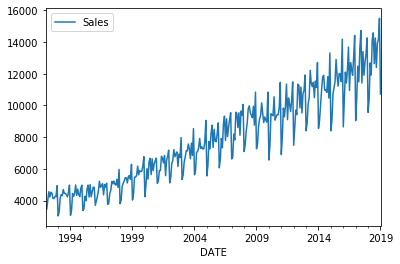

In [8]:
df.plot()

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
results = seasonal_decompose(df['Sales'])

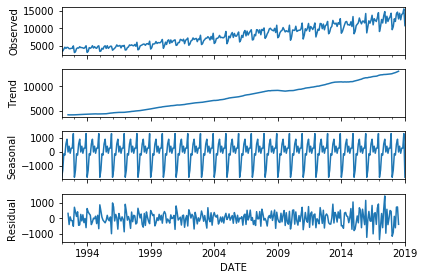

In [11]:
results.plot();

In [12]:
len(df)

325

In [13]:
df.index.freq = 'MS'

In [14]:
train = df.iloc[:313]

test = df.iloc[313:]

In [15]:
test

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [16]:
len(test)

12

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
 scaler = MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
scaled_train = scaler.transform(train)

scaled_test = scaler.transform(test)

In [21]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
n_input = 3
n_features = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [24]:
n_input = 12
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [25]:
model = Sequential()

model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [27]:
#epochs are single run though your training data.

model.fit_generator(train_generator,epochs=25)


Epoch 1/25
301/301 [==============================] - 4s 15ms/step - loss: 0.0173
Epoch 2/25
301/301 [==============================] - 4s 12ms/step - loss: 0.0094
Epoch 3/25
301/301 [==============================] - 4s 12ms/step - loss: 0.0085
Epoch 4/25
301/301 [==============================] - 4s 12ms/step - loss: 0.0079
Epoch 5/25
301/301 [==============================] - 4s 12ms/step - loss: 0.0059
Epoch 6/25
301/301 [==============================] - 4s 12ms/step - loss: 0.0055
Epoch 7/25
301/301 [==============================] - 4s 12ms/step - loss: 0.0042
Epoch 8/25
301/301 [==============================] - 4s 12ms/step - loss: 0.0037
Epoch 9/25
301/301 [==============================] - 4s 13ms/step - loss: 0.0029
Epoch 10/25
301/301 [==============================] - 4s 14ms/step - loss: 0.0024
Epoch 11/25
301/301 [==============================] - 4s 15ms/step - loss: 0.0021
Epoch 12/25
301/301 [==============================] - 4s 14ms/step - loss: 0.0020
Epoch 13/25
3

In [28]:
model.history.history.keys()


dict_keys(['loss'])

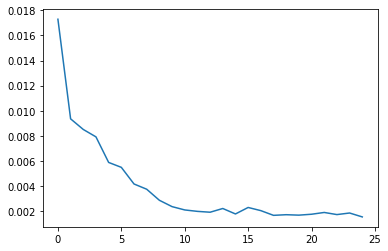

In [34]:
myloss = model.history.history['loss']
plt.plot(range(len(myloss)),myloss)

In [37]:
first_eval_batch = scaled_train[-12:]

In [48]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))

In [49]:
first_eval_batch.shape

(1, 12, 1)

In [50]:

model.predict(first_eval_batch)

array([[0.70728767]], dtype=float32)

In [53]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

# FORECAST USING RNN MODEL

In [63]:
test_predictions = [] #holding my predictions

#last n_inputs points from traning set
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))


for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    #store that prediction
    test_predictions.append(current_pred)
    
    #update current batch to include prediction
    
    current_batch = np.append(current_batch[:1,:],[[current_pred]],axis=1)
    

ValueError: Error when checking input: expected lstm_1_input to have shape (12, 1) but got array with shape (13, 1)